FIAP

# Checkpoint 06

Faça o exercício abaixo <font color="red">em grupos de até 4 pessoas</font>, para praticar o uso do `sklearn avançado` em Machine Learning. Utilize os conceitos vistos em aula, e consulte [documentações](https://scikit-learn.org/stable/) na internet. Em caso de dúvidas, contate o Prof. Michel. 

**Entrega**: 28/outubro/2022, via Teams.


## Apresentação do trabalho

Vamos trabalhar com uma base de dados que <font color="red">mapeia o **preço de smartphones** em 4 faixas possíveis de acordo com as características do aparelho</font>. A base original está no [Kaggle](https://www.kaggle.com/iabhishekofficial/mobile-price-classification). 


**O desafio**: utilizando todos os atributos fornecidos (veja abaixo), exceto o `price_range`, faça uma clusterização dos dados descobrindo qual o número ideal de grupos. Compare sua resposta com os valores possíveis de `price_range`. 

    a. Sua análise levou a mais ou menos clusteres que o esperado? 
    
    b. Baseado nos valores das amostras pertencentes a cada um dos clusteres formados, o que eles significam? 
    
  
**Importante**: lembre-se dos passos do pipeline de machine learning para uso do sklearn! Precisamos ler a base, limpá-la, pensar em quais dados serão incorporados nos modelos, padronizar dados, etc. Ao entrar no Kaggle para baixar os dados, utilizem o arquivo `train.csv`. Podem ignorar o arquivo `test.csv`.


**Critérios de avaliação**: A correção do checkpoint será feita mediante os seguintes critérios:
- qualidade da compreensão e exploração da base
- qualidade/profundidade da limpeza dos dados 
- escolha de dados pertinentes para uso nos modelos 
- formas de padronizar os dados selecionados
- completute de atendimento ao pipeline de machine learning
- emprego correto dos conceitos vistos em sala de aula
- análise/justificativas dos resultados com células markdown


### A base de dados 

As variáveis são: 
- `id`: ID
- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Megabytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)




In [1]:
#############################
#                           #
#   Participantes do grupo  #
#                           #
#############################

# Jhonatas Oliveira - RA do aluno 93423

# Nathalia Lopes - RA do aluno 95962

# Gabriel Mira - RA do aluno 95694



In [31]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

from random import sample
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans, DBSCAN

In [3]:
#LEITURA DE DADOS
link = "/content/train.csv"
train = pd.read_csv(link)
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.info()
train.describe()
#foi observado que nao existe dados nulos, NaN na base, tudo limpo.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
train.drop_duplicates(keep='first', inplace=True) 
#Removendo dados duplicados, foi observado que nao tem nenhum

In [6]:
train.drop(["price_range"], axis=1, inplace=True) # Removendo a coluna Price_range


In [7]:
sc = StandardScaler() #Normalizando os dados
sc.fit_transform(train)

mm = MinMaxScaler(feature_range=(10, 20))
mm.fit_transform(train)

array([[12.27788911, 10.        , 16.8       , ..., 10.        ,
        10.        , 20.        ],
       [13.47361389, 20.        , 10.        , ..., 20.        ,
        20.        , 10.        ],
       [10.41416166, 20.        , 10.        , ..., 20.        ,
        20.        , 10.        ],
       ...,
       [19.41883768, 10.        , 11.6       , ..., 20.        ,
        20.        , 10.        ],
       [16.75350701, 10.        , 11.6       , ..., 20.        ,
        20.        , 20.        ],
       [10.06012024, 20.        , 16.        , ..., 20.        ,
        20.        , 20.        ]])

In [8]:
train #nova padronização com normalização

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [9]:
train.dual_sim.value_counts(dropna=False) # / train.shape[0]

1    1019
0     981
Name: dual_sim, dtype: int64

In [10]:
train.wifi.value_counts(dropna=False)  #/ train.shape[0]

1    1014
0     986
Name: wifi, dtype: int64

In [11]:
train.int_memory.value_counts(dropna=False)  #/ train.shape[0]

27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

In [12]:
train.wifi.value_counts(dropna=False)

1    1014
0     986
Name: wifi, dtype: int64

In [52]:
X = train.div( train.sum(axis=1), axis="rows") #Transformando os dados em apontamentos, agrupando por distancia cosseno  
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,clus
0,0.191025,0.000000,0.000499,0.000000,0.000227,0.000000,0.001588,0.000136,0.042652,0.000454,...,0.004537,0.171514,0.578293,0.002042,0.001588,0.004311,0.000000,0.000000,0.000227,0.000454
1,0.150674,0.000148,0.000074,0.000148,0.000000,0.000148,0.007821,0.000103,0.020070,0.000443,...,0.133556,0.293380,0.388271,0.002509,0.000443,0.001033,0.000148,0.000148,0.000000,0.000000
2,0.088350,0.000157,0.000078,0.000157,0.000314,0.000157,0.006434,0.000141,0.022754,0.000785,...,0.198198,0.269286,0.408480,0.001726,0.000314,0.001412,0.000157,0.000157,0.000000,0.000000
3,0.093432,0.000152,0.000380,0.000000,0.000000,0.000000,0.001519,0.000122,0.019902,0.000912,...,0.184738,0.271334,0.420674,0.002431,0.001215,0.001671,0.000152,0.000000,0.000000,0.000000
4,0.308655,0.000169,0.000203,0.000000,0.002203,0.000169,0.007458,0.000102,0.023899,0.000339,...,0.204753,0.205431,0.239161,0.001356,0.000339,0.002542,0.000169,0.000169,0.000000,0.000508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.167323,0.000211,0.000105,0.000211,0.000000,0.000211,0.000421,0.000169,0.022338,0.001264,...,0.257518,0.398289,0.140771,0.002740,0.000843,0.004004,0.000211,0.000211,0.000000,0.000211
1996,0.274526,0.000140,0.000363,0.000140,0.000000,0.000000,0.005449,0.000028,0.026125,0.000559,...,0.127833,0.274526,0.283886,0.001537,0.001397,0.002235,0.000140,0.000140,0.000140,0.000419
1997,0.249850,0.000000,0.000118,0.000131,0.000131,0.000131,0.004707,0.000092,0.014120,0.001046,...,0.113485,0.213372,0.399681,0.001177,0.000131,0.000654,0.000131,0.000131,0.000000,0.000523
1998,0.414587,0.000000,0.000247,0.000000,0.001097,0.000274,0.012613,0.000027,0.039759,0.001371,...,0.092131,0.183713,0.238278,0.004936,0.002742,0.005210,0.000274,0.000274,0.000274,0.000823


In [30]:
km = KMeans(n_clusters=8)
km.fit_predict(X)



array([0, 5, 5, ..., 4, 7, 0], dtype=int32)

In [15]:
distortions = []
n_clusters = range(2, 15)
for n_clus in n_clusters:
  distortions.append(KMeans(n_clusters=n_clus,max_iter=10_000, n_init=100, random_state=61658).fit(X).inertia_)

In [51]:
distortions

[42.20571223953666,
 33.752483871056725,
 27.660017963306323,
 23.634547447373997,
 21.043634358087203,
 18.92387712143978,
 17.083825572497638,
 15.904154091490534,
 14.818883954081514,
 13.862647076831978,
 13.02117545659432,
 12.222186388065708,
 11.570070988925274]

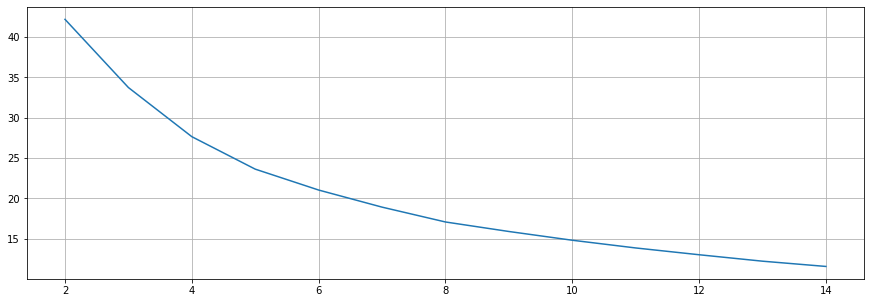

In [50]:
plt.figure(figsize=(15,5)) #Percebe-se o cotovelo do gráfico, pela analise feita entre 4 à 6, ou seja, 5 clusters.
plt.plot(n_clusters, distortions)
plt.grid()

In [49]:
km = KMeans(n_clusters= 5,max_iter=10_000, n_init=100, random_state=61658) #criando os predicts com os dados transformados, passando o nº de clusters analisado na tabela
db = DBSCAN(eps=0.5) 
c_km = km.fit_predict(X)
c_db = db.fit_predict(X)

x_transformado = km.fit_predict(X)








In [66]:
convert = X.sample(n= 100) #convertentdo para amostras pequenas a fim de exibir o resultado 

kmen = convert["label_kmeans"].sample(n= 100)
dbs = convert["label_dbscan"].sample(n= 100) 



#kmen = convert["label_kmeans"].sample(n=100) 
#dbs = convert["label_dbscan"].sample(n=100) 







In [45]:
c_db

array([0, 0, 0, ..., 0, 0, 0])

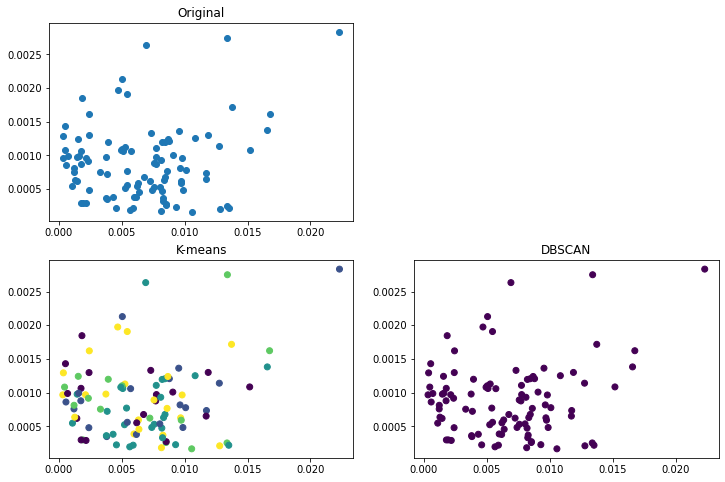

In [67]:
#graficos dos agrupamentos originais, K-Means e DBSCAN, foi observado os agrupamentos bem expressivos no K-means, já no dbs algo homogenio.




fig = plt.figure( figsize=(12, 8) )

plt.subplot(2, 2, 1)
plt.title("Original")
plt.scatter(x=convert['int_memory'], y=convert["n_cores"])

plt.subplot(2, 2, 3)
plt.title("K-means")
plt.scatter(x=convert['int_memory'], y=convert["n_cores"],c=kmen)

plt.subplot(2, 2, 4)
plt.title("DBSCAN")
plt.scatter(x=convert['int_memory'], y=convert["n_cores"],c=dbs)

plt.show()

In [33]:
train.loc[:, 'clus' ] = x_transformado #Adicionando os clusters na tabela. Observe que o price-Range alguns momentos se assemelham com os clus
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,clus
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,1
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,4
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,3
